In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Overall Level

### EV Charging Stations

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/3_EVChargingStationLocations
!ls
df1 = pd.read_csv("alt_fuel_stations(Sep_25_2022).csv",dtype={'EV Other Info': 'str', 
                                                               'Federal Agency Name': 'str',
                                                               'Intersection Directions (French)': 'str',
                                                               'Federal Agency Code': 'str'})
df1.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Capstone-KPMG/Data_Exploration/4_EVChargingStationLocations
'alt_fuel_stations(Sep_25_2022).csv'


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,NaN,626-575-6800,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,800-256-6219,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,NaN,951-351-3110,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
df1_us = df1.query("Country == 'US'").groupby("State").count()['Station Name']
df1_us.head()

State
AK       53
AL      232
AR      180
AZ      845
CA    13528
Name: Station Name, dtype: int64

In [ ]:
# Check for US data
# df1_us = df1.query("Country == 'US'").groupby("State").count()['Station Name']

states = {
            'AK': 'Alaska',
            'AL': 'Alabama',
            'AR': 'Arkansas',
            'AS': 'American Samoa',
            'AZ': 'Arizona',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DC': 'District of Columbia',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'GU': 'Guam',
            'HI': 'Hawaii',
            'IA': 'Iowa',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'MA': 'Massachusetts',
            'MD': 'Maryland',
            'ME': 'Maine',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MO': 'Missouri',
            'MP': 'Northern Mariana Islands',
            'MS': 'Mississippi',
            'MT': 'Montana',
            'NA': 'National',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'NE': 'Nebraska',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NV': 'Nevada',
            'NY': 'New York',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
#            'PR': 'Puerto Rico',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VA': 'Virginia',
            'VI': 'Virgin Islands',
            'VT': 'Vermont',
            'WA': 'Washington',
            'WI': 'Wisconsin',
            'WV': 'West Virginia',
            'WY': 'Wyoming'
    }
#df1['State_full'] = df1['State'].replace(states)
#df1_us = df1[df1['State'].isin(states.keys())].groupby("State_full").count()['Station Name']
df1_us = df1[df1['State'].isin(states.keys())].groupby("State").count()['Station Name']
df1_us_df = pd.DataFrame(df1_us).reset_index().sort_values('State')
df1_us_df.head()

,State,Station Name
0,AK,53
1,AL,232
2,AR,180
3,AZ,845
4,CA,13530


## EV Registrations (December 31, 2021)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/4_EVRegistrationCount
!ls
df2 = pd.read_excel("2021 Light-Duty Vehicle Registration Counts by State and Fuel Type.xlsx", header = 1,nrows = 51)#, usecols = "B:C")
df2.head()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Capstone-KPMG/Data_Exploration/5_EVRegistrationCount
 10962-ev-registration-counts-by-state_6-30-22.xlsx
'2021 Light-Duty Vehicle Registration Counts by State and Fuel Type.xlsx'
 electric-vehicle-registr.png


,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel
0,Alabama,4700.0,3300.0,42500.0,40500.0,449500.0,500.0,100.0,0.0,0.0,4051000.0,123500.0
1,Alaska,1300.0,500.0,7300.0,7600.0,50100.0,100.0,0.0,0.0,0.0,464200.0,31700.0
2,Arizona,40700.0,15500.0,132200.0,51000.0,460400.0,900.0,900.0,0.0,0.0,5395300.0,191800.0
3,Arkansas,2400.0,1800.0,26100.0,28700.0,290200.0,300.0,0.0,0.0,0.0,2241600.0,88800.0
4,California,563100.0,315300.0,1355900.0,163600.0,1343200.0,12600.0,1500.0,11800.0,0.0,30512600.0,710500.0


In [ ]:
states_rev = dict((v, k) for k, v in states.items())
df2['State'] = df2['State'].replace(states_rev)
df2['Total'] = df2.sum(axis=1,numeric_only=None)
df2['EV %'] = df2['Electric (EV)']/df2['Total']*100

<ipython-input-118-e8229e5595d7>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2['Total'] = df2.sum(axis=1,numeric_only=None)


In [ ]:
df12 = df2.merge(pd.DataFrame(df1_us_df).reset_index(), left_on='State', right_on='State')
df12.head()

,State,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Total,EV %,index,Station Name
0,AL,4700.0,3300.0,42500.0,40500.0,449500.0,500.0,100.0,0.0,0.0,4051000.0,123500.0,4715600.0,0.099669,1,232
1,AK,1300.0,500.0,7300.0,7600.0,50100.0,100.0,0.0,0.0,0.0,464200.0,31700.0,562800.0,0.230988,0,53
2,AZ,40700.0,15500.0,132200.0,51000.0,460400.0,900.0,900.0,0.0,0.0,5395300.0,191800.0,6288700.0,0.647193,3,845
3,AR,2400.0,1800.0,26100.0,28700.0,290200.0,300.0,0.0,0.0,0.0,2241600.0,88800.0,2679900.0,0.089556,2,180
4,CA,563100.0,315300.0,1355900.0,163600.0,1343200.0,12600.0,1500.0,11800.0,0.0,30512600.0,710500.0,34990100.0,1.609312,4,13530


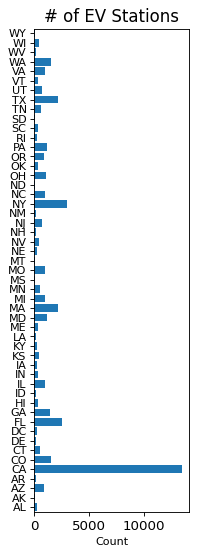

In [ ]:
plt.figure(figsize=(2.5, 8), dpi=80)
plt.barh(df12['State'],df12['Station Name'],align = 'center')
plt.title("# of EV Stations", fontdict={'fontsize': 15})
plt.xlabel("Count")
plt.xticks( fontsize=12)
plt.yticks(fontsize = 10) #rotation=45,
plt.ylim(bottom = -0.5, top = 50.5)
plt.show()

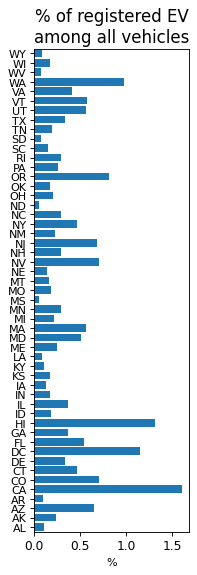

In [ ]:

plt.figure(figsize=(2.5, 8), dpi=80)
plt.barh(df12['State'],df12['EV %'])#, color = "darkorange")
plt.title("% of registered EV\namong all vehicles", fontdict={'fontsize': 15})
plt.xticks( fontsize=11)
plt.xlabel("%")
plt.yticks(fontsize = 10) #rotation=45,
plt.ylim(bottom = -0.5, top = 50.5)
plt.show()

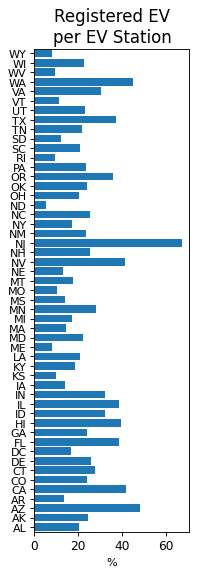

In [ ]:
df12 = df2.merge(pd.DataFrame(df1_us_df).reset_index(), left_on='State', right_on='State')
plt.figure(figsize=(2.5, 8), dpi=80)
plt.barh(df12['State'],df12['Electric (EV)']/df12['Station Name'])
plt.title("Registered EV\nper EV Station",  fontdict={'fontsize': 15})
plt.xticks( fontsize=11)
plt.xlabel("%")
plt.yticks(fontsize = 10)
plt.ylim(bottom = -0.5, top = 50.5)
plt.show()

## Population by state

data source:
- https://data.census.gov/cedsci/table?q=population%20by%20state&y=2021&tid=ACSDP1Y2021.DP05&tp=false

In [ ]:
def create_list_with_key_words(list_names):
  result = []
  changed_result = [] 
  sub_str = "Estimate"
  for i in list_names:
    if sub_str in i:
      j = i.split("!!")
      result.append(i)
      changed_result.append(j[0])
  return result,changed_result

In [ ]:
def remove_comma(num_list):
  result = []
  for i in num_list:
    i = int(i.replace(",", ""))
    result.append(i)
  return result

In [ ]:
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/1_ACS
!ls
df = pd.read_csv("ACSDP1Y2021.DP05-2022-09-27T021319.csv")
col_list, renamed_cols = create_list_with_key_words(list(df.columns))
df_new = df[col_list]
df_new.columns = renamed_cols
df_new = df_new.loc[[1],:]
df_new = df_new.T
df_new.columns = ['population']
df_new['population'] = remove_comma(list(df_new['population']))
df_new.head()


/content/drive/My Drive/Capstone-KPMG/Data_Exploration/1_ACS
ACSDP1Y2021.DP05-2022-09-27T021319.csv	ACSST5Y2020.S1901-Column-Metadata.csv
ACSDP5Y2020.DP05-Column-Metadata.csv	ACSST5Y2020.S1901-Data.csv
ACSDP5Y2020.DP05-Data.csv		ACSST5Y2020.S1901-Table-Notes.txt
ACSDP5Y2020.DP05-Table-Notes.txt


,population
Alabama,5039877
Alaska,732673
Arizona,7276316
Arkansas,3025891
California,39237836


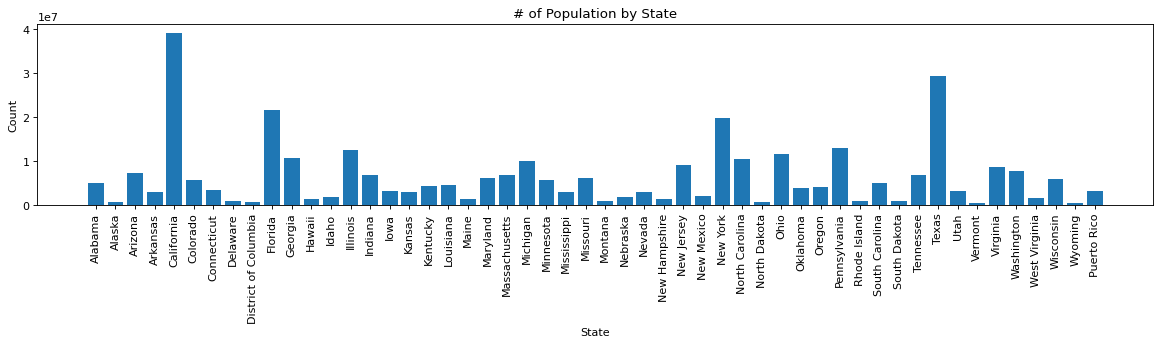

In [ ]:
plt.figure(figsize=(18, 3), dpi=80)
plt.bar(df_new.index,df_new.iloc[:,0])
plt.title("# of Population by State")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

In [ ]:
df_copy = df_new.copy()
df_copy.reset_index(inplace=True)
df_copy.columns = ['State','Population']
df_copy.head()

,State,Population
0,Alabama,5039877
1,Alaska,732673
2,Arizona,7276316
3,Arkansas,3025891
4,California,39237836


In [ ]:
new_df_population_EV_regi = pd.merge(df_copy, df12, on="State")
new_df_population_EV_regi['ratio'] = new_df_population_EV_regi['Electric (EV)']/new_df_population_EV_regi['Population']
new_df_population_EV_regi.head()

,State,Population,Electric (EV),Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Propane,Hydrogen,Methanol,Gasoline,Diesel,Total,EV %,State_full,Station Name,ratio
0,Alabama,5039877,4700.0,3300.0,42500.0,40500.0,449500.0,500.0,100.0,0.0,0.0,4051000.0,123500.0,4715600.0,0.099669,Alabama,232,0.000933
1,Alaska,732673,1300.0,500.0,7300.0,7600.0,50100.0,100.0,0.0,0.0,0.0,464200.0,31700.0,562800.0,0.230988,Alaska,53,0.001774
2,Arizona,7276316,40700.0,15500.0,132200.0,51000.0,460400.0,900.0,900.0,0.0,0.0,5395300.0,191800.0,6288700.0,0.647193,Arizona,845,0.005593
3,Arkansas,3025891,2400.0,1800.0,26100.0,28700.0,290200.0,300.0,0.0,0.0,0.0,2241600.0,88800.0,2679900.0,0.089556,Arkansas,180,0.000793
4,California,39237836,563100.0,315300.0,1355900.0,163600.0,1343200.0,12600.0,1500.0,11800.0,0.0,30512600.0,710500.0,34990100.0,1.609312,California,13530,0.014351


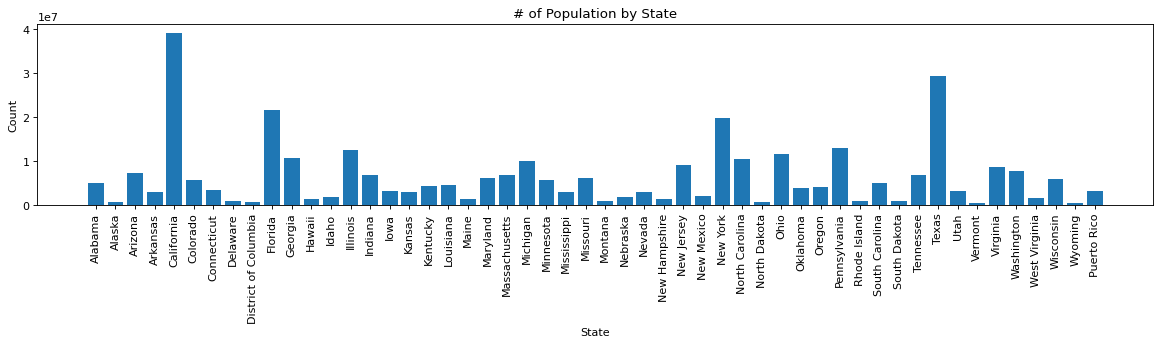

In [ ]:
plt.figure(figsize=(18, 3), dpi=80)
plt.bar(df_new.index,df_new.iloc[:,0])
plt.title("# of Population by State")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

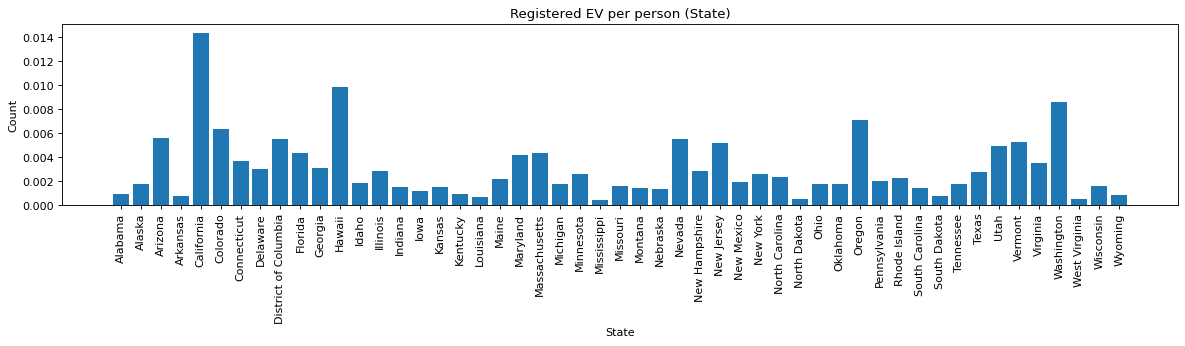

In [ ]:
plt.figure(figsize=(18, 3), dpi=80)
plt.bar(new_df_population_EV_regi['State'],new_df_population_EV_regi['ratio'])
plt.title("Registered EV per person (State)")
plt.xlabel("State")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

## Washington State

In [ ]:
!pip install folium
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 7.3 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/Data_Exploration/WA_Data
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Capstone-KPMG/Data_Exploration/WA_Data
 Electric_Vehicle_Population_Data.csv
 gas_station_w_crime_population.csv
 gas_station_with_county.csv
 m_large_traffic.html
 Registration_2018.csv
 Registration_2019.csv
 Registration_2020.csv
 Registration_2021.csv
 us_counties.json
 Vehicle_Registration_Transactions_by_Department_of_Licensing.csv
'WA_city_county(wiki).xlsx'
 wa_city_shape.json
 WA_county_population.csv
'WA Data Directory.gdoc'


In [ ]:
import pandas as pd

EV_count = pd.read_csv('Electric_Vehicle_Population_Data.csv')
EV_count = EV_count[EV_count['State']=='WA']
EV_count = EV_count['County'].value_counts().to_frame().reset_index().rename(columns={'index':'County','County':'count'})

In [ ]:
import json
import numpy as np

# load my geojson file which contains my Polygons
boundary_file = "us_counties.json"
with open(boundary_file, 'r') as f:
    counties_boundary = json.load(f)


# Filter python objects with list comprehensions
output_dict = [x for x in counties_boundary["features"] if x['properties']["STATE"] == '53']
counties_boundary["features"] = output_dict
# # Transform python object back into json
# output_json = json.dumps(output_dict)
#counties_boundary

In [ ]:
counties_boundary

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'GEO_ID': '0500000US53013',
    'STATE': '53',
    'COUNTY': '013',
    'NAME': 'Columbia',
    'LSAD': 'County',
    'CENSUSAREA': 868.629},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-118.228928, 46.593606],
      [-118.224468, 46.591022],
      [-118.21566, 46.588924],
      [-118.172552, 46.556947],
      [-117.851844, 46.624772],
      [-117.863261, 46.470935],
      [-117.737301, 46.471366],
      [-117.675113, 46.337628],
      [-117.611815, 46.338496],
      [-117.603163, 45.998887],
      [-117.977766, 46.000695],
      [-117.996911, 46.000787],
      [-117.991292, 46.207843],
      [-118.116493, 46.207912],
      [-118.116139, 46.295455],
      [-118.241611, 46.295072],
      [-118.228928, 46.593606]]]}},
  {'type': 'Feature',
   'properties': {'GEO_ID': '0500000US53021',
    'STATE': '53',
    'COUNTY': '021',
    'NAME': 'Franklin',
    'LSAD': 'County',
    'CENSUSAREA': 1242.17

In [ ]:
import folium
import numpy as np

# grab the center of our map using our cool function
center = 47.7511, -120.7401

# Initialize Folium Map again (same as before)
m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)


# Create choropleth map  
folium.Choropleth(
    geo_data=counties_boundary,
    name='choropleth',
    data=EV_count,
    columns=['County', 'count'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='count'
).add_to(m)
m

In [ ]:
pop = pd.read_csv('WA_county_population.csv')
pop = pop.drop(columns=['Rank'])

In [ ]:
ev_pop = pd.merge(EV_count,pop,on='County')
ev_pop['ratio'] = ev_pop['count'] / (ev_pop['Population']/1000)

In [ ]:
import folium
import numpy as np

# grab the center of our map using our cool function
center = 47.7511, -120.7401

# Initialize Folium Map again (same as before)
m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)


# Create choropleth map  
folium.Choropleth(
    geo_data=counties_boundary,
    name='choropleth',
    data=ev_pop,
    columns=['County', 'ratio'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='EV count per 1k People'
).add_to(m)
m

In [ ]:
import matplotlib.pyplot as plt

registration = pd.read_csv('Registration_WA.csv')[['Fuel Type','County','Total']]
overall = registration.groupby('Fuel Type')['Total'].sum()
fig1, ax1 = plt.subplots()
ax1.pie(overall, labels=overall.index,autopct='%1.1f%%',labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()

FileNotFoundError: ignored

In [ ]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/3_EVChargingStationLocations
!ls
charging_station = pd.read_csv("alt_fuel_stations(Sep_25_2022).csv",dtype={'EV Other Info': 'str', 
                                                               'Federal Agency Name': 'str',
                                                               'Intersection Directions (French)': 'str',
                                                               'Federal Agency Code': 'str'})
charging_station.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1vvRy60J06fZq-dj8EPVTkgHU4gq8OCqU/Capstone-KPMG/Data_Exploration/4_EVChargingStationLocations
'alt_fuel_stations(Sep_25_2022).csv'


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,ELEC,California Air Resources Board,9530 Telstar Ave,NaN,El Monte,CA,91731,NaN,626-575-6800,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,ELEC,Scripps Green Hospital,10666 N Torrey Pines Rd,"Patient Parking Structure, level G",La Jolla,CA,92037,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,ELEC,Galpin Motors,15421 Roscoe Blvd,NaN,Sepulveda,CA,91343,NaN,800-256-6219,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,ELEC,Galleria at Tyler,1299 Galleria at Tyler,NaN,Riverside,CA,92503,NaN,951-351-3110,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
charging_station = charging_station[charging_station['State']=='WA']

In [ ]:
from uszipcode import SearchEngine
engine = SearchEngine()
charging_station['County'] = charging_station['ZIP'].apply(lambda x: engine.by_zipcode(x).county)

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [ ]:
charging_station['County'] = charging_station['County'].apply(lambda x: x.replace(" County",''))

In [ ]:
station_per_county = charging_station['County'].value_counts().to_frame().reset_index().rename(columns={'County':'station_count','index':'County'})

In [ ]:
station_car_ratio = pd.merge(EV_count,station_per_county,on='County',how='left').fillna(0)
station_car_ratio['ratio'] = station_car_ratio['count']/station_car_ratio['station_count']
station_car_ratio['ratio'] = station_car_ratio['ratio'].replace(np.inf,0)

In [ ]:
import folium
import numpy as np

# grab the center of our map using our cool function
center = 47.7511, -120.7401

# Initialize Folium Map again (same as before)
m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)


# Create choropleth map  
folium.Choropleth(
    geo_data=counties_boundary,
    name='choropleth',
    data=station_car_ratio,
    columns=['County', 'ratio'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='EV/Station ratio'
).add_to(m)
m

In [ ]:
ev_station_pop = pd.merge(station_per_county,pop,on='County')
ev_station_pop['ratio'] = ev_station_pop['station_count'] / (ev_pop['Population']/1000)
ev_station_pop

,County,station_count,Population,ratio
0,King,748,2252305,0.332104
1,Pierce,120,925708,0.143964
2,Snohomish,90,833540,0.097223
3,Spokane,69,546040,0.134923
4,Clark,68,511404,0.228206
5,Thurston,57,297977,0.207791
6,Kitsap,35,274314,0.152951
7,Chelan,34,79646,0.062267
8,Whatcom,32,228831,0.152363
9,Skagit,30,130696,0.343124


In [ ]:
# Initialize Folium Map again (same as before)
m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)


# Create choropleth map  
folium.Choropleth(
    geo_data=counties_boundary,
    name='choropleth',
    data=ev_station_pop,
    columns=['County', 'ratio'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    nan_fill_opacity=0,
    line_opacity=1,
    legend_name='EV station count per 1k People'
).add_to(m)
m

In [ ]:
EV_count

,County,count
0,King,55879
1,Snohomish,11856
2,Pierce,8256
3,Clark,6409
4,Thurston,4032
5,Kitsap,3799
6,Whatcom,2783
7,Spokane,2756
8,Benton,1332
9,Island,1290


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/13_WA_Data
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1vvRy60J06fZq-dj8EPVTkgHU4gq8OCqU/Capstone-KPMG/Data_Exploration/WA_Data
 Electric_Vehicle_Population_Data.csv
 gas_station_w_crime_population.csv
 gas_station_with_county.csv
 m_large_traffic.html
 Registration_2018.csv
 Registration_2019.csv
 Registration_2020.csv
 Registration_2021.csv
 us_counties.json
 Vehicle_Registration_Transactions_by_Department_of_Licensing.csv
'WA_city_county(wiki).xlsx'
 wa_city_shape.json
 WA_county_population.csv
'WA Data Directory.gdoc'


<ipython-input-16-8736522b1244>:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(reg_df, colors = colors, labels=reg_df.index, autopct='%1.1f%%', startangle=0, pctdistance=0.7, explode = explode)


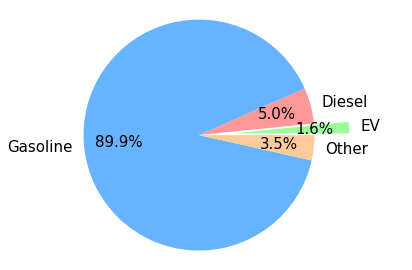

In [ ]:
# initialize list elements
data = [109210,342600,6133590,240700]	
cols = ['EV', 'Diesel', 'Gasoline', 'Other']		
colors = ['#99ff99','#ff9999','#66b3ff','#ffcc99']
plt.rcParams['font.size'] = 15
 
# Create the pandas DataFrame with column name is provided explicitly
reg_df = pd.DataFrame(data, index=cols)
explode = (0.3,0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(reg_df, colors = colors, labels=reg_df.index, autopct='%1.1f%%', startangle=0, pctdistance=0.7, explode = explode)
# #draw circle
# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:

!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.8/dist-packages
Requires: kiwisolver, cycler, numpy, pyparsing, python-dateutil
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


In [ ]:
overall

Fuel Type
Electricity Powered      69445
Gas Powered            6633373
None                    906568
non-Gas Powered         730351
Name: Total, dtype: int64

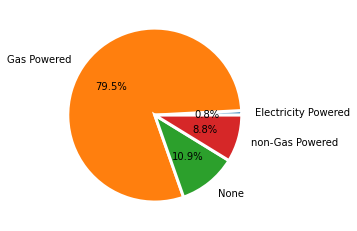

In [ ]:
registration = pd.read_csv('Registration_2021.csv')[['Fuel Type','County','Total']]
overall = registration.groupby('Fuel Type')['Total'].sum()
fig1, ax1 = plt.subplots()
ax1.pie(overall, labels=overall.index,autopct='%1.1f%%',labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()

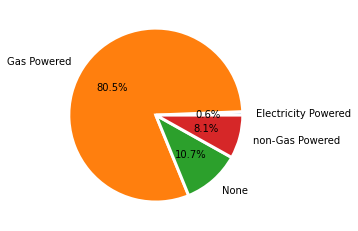

In [ ]:
registration = pd.read_csv('Registration_2020.csv')[['Fuel Type','County','Total']]
overall = registration.groupby('Fuel Type')['Total'].sum()
fig1, ax1 = plt.subplots()
ax1.pie(overall, labels=overall.index,autopct='%1.1f%%',labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()

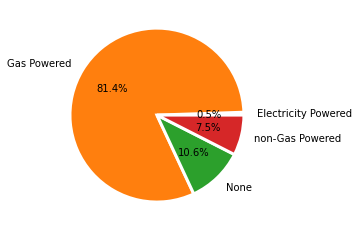

In [ ]:
registration = pd.read_csv('Registration_2019.csv')[['Fuel Type','County','Total']]
overall = registration.groupby('Fuel Type')['Total'].sum()
fig1, ax1 = plt.subplots()
ax1.pie(overall, labels=overall.index,autopct='%1.1f%%',labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()

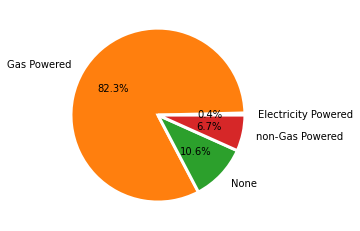

In [ ]:
registration = pd.read_csv('Registration_2018.csv')[['Fuel Type','County','Total']]
overall = registration.groupby('Fuel Type')['Total'].sum()
fig1, ax1 = plt.subplots()
ax1.pie(overall, labels=overall.index,autopct='%1.1f%%',labeldistance=1.15,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.show()

In [ ]:
pd.read_csv('Registration_2018.csv')[['Fuel Type','County','Total']]

,Fuel Type,County,Total
0,Electricity Powered,01 ADAMS,6
1,Electricity Powered,02 ASOTIN,13
2,Electricity Powered,03 BENTON,227
3,Electricity Powered,04 CHELAN,116
4,Electricity Powered,05 CLALLAM,120
...,...,...,...
156,None,37 WHATCOM,29775
157,None,38 WHITMAN,6373
158,None,39 YAKIMA,32435
159,None,40 STATE,2233


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/3_Data_Exploration/15_Funding
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1vvRy60J06fZq-dj8EPVTkgHU4gq8OCqU/Capstone-KPMG/Data_Exploration/Funding
fundings.csv


In [ ]:
funding = pd.read_csv('fundings.csv')
funding['amount'].sum()

193145200.0

In [ ]:
overall = funding.groupby('purpose')['amount'].sum().to_frame()
overall['amount'] = overall['amount']/1000000

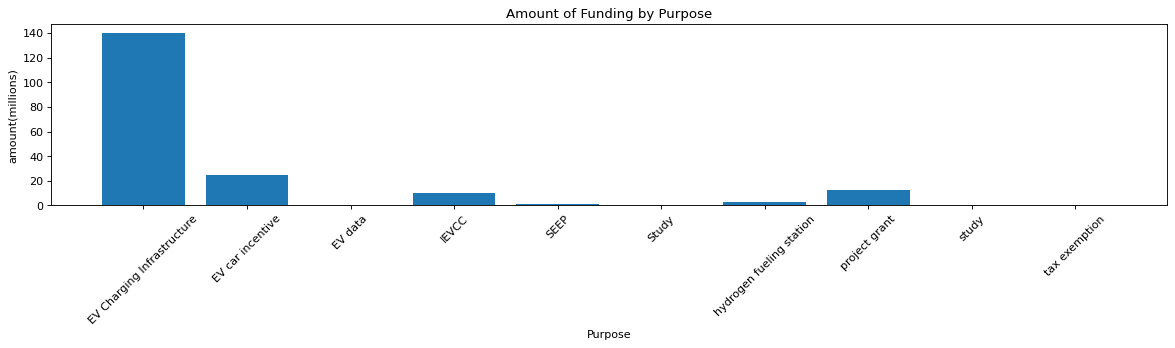

In [ ]:

plt.figure(figsize=(18, 3), dpi=80)
plt.bar(overall.index, overall['amount'])
plt.title("Amount of Funding by Purpose")
plt.xlabel("Purpose")
plt.xticks(rotation = 45)
plt.ylabel("amount(millions)")
plt.show()